#                                              Business Insight

In [1]:
import sqlalchemy
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
eng = create_engine("mssql+pyodbc://LAPTOP-NKOE7QN2\DATAANALYST/CS?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes")

df = pd.read_sql("select top 2900000 * from Indrive" , eng)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 01:55:47,2020-01-01 02:04:31,1,1.40,1,N,233,107,1,7.5,3,0.5,1,0,0.3,12.3,2.5
1,2,2020-01-01 01:43:48,2020-01-01 01:54:32,3,1.54,1,N,148,87,1,9,0.5,0.5,2.56,0,0.3,15.36,2.5
2,2,2020-01-01 01:55:22,2020-01-01 02:10:30,1,3.59,1,N,87,256,1,14,0.5,0.5,2,0,0.3,19.8,2.5
3,2,2020-01-01 01:24:17,2020-01-01 01:43:35,1,4.27,1,N,262,100,2,17,0.5,0.5,0,0,0.3,20.8,2.5
4,2,2020-01-01 01:51:07,2020-01-01 02:07:04,1,1.54,1,N,48,234,2,11,0.5,0.5,0,0,0.3,14.8,2.5


In [3]:
df.dtypes                

VendorID                 object
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          object
trip_distance            object
RatecodeID               object
store_and_fwd_flag       object
PULocationID             object
DOLocationID             object
payment_type             object
fare_amount              object
extra                    object
mta_tax                  object
tip_amount               object
tolls_amount             object
improvement_surcharge    object
total_amount             object
congestion_surcharge     object
dtype: object

In [4]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [5]:
df.dtypes

VendorID                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                  object
trip_distance                    object
RatecodeID                       object
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                     object
fare_amount                      object
extra                            object
mta_tax                          object
tip_amount                       object
tolls_amount                     object
improvement_surcharge            object
total_amount                     object
congestion_surcharge             object
dtype: object

In [6]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1,2020-01-01 01:55:47,2020-01-01 02:04:31,1,1.40,1,N,233,107,1,7.5,3,0.5,1,0,0.3,12.3,2.5,0 days 00:08:44
1,2,2020-01-01 01:43:48,2020-01-01 01:54:32,3,1.54,1,N,148,87,1,9,0.5,0.5,2.56,0,0.3,15.36,2.5,0 days 00:10:44
2,2,2020-01-01 01:55:22,2020-01-01 02:10:30,1,3.59,1,N,87,256,1,14,0.5,0.5,2,0,0.3,19.8,2.5,0 days 00:15:08
3,2,2020-01-01 01:24:17,2020-01-01 01:43:35,1,4.27,1,N,262,100,2,17,0.5,0.5,0,0,0.3,20.8,2.5,0 days 00:19:18
4,2,2020-01-01 01:51:07,2020-01-01 02:07:04,1,1.54,1,N,48,234,2,11,0.5,0.5,0,0,0.3,14.8,2.5,0 days 00:15:57


In [7]:
df['duration2'] = df['duration'].dt.total_seconds()/60
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,duration2
0,1,2020-01-01 01:55:47,2020-01-01 02:04:31,1,1.40,1,N,233,107,1,7.5,3,0.5,1,0,0.3,12.3,2.5,0 days 00:08:44,8.733333
1,2,2020-01-01 01:43:48,2020-01-01 01:54:32,3,1.54,1,N,148,87,1,9,0.5,0.5,2.56,0,0.3,15.36,2.5,0 days 00:10:44,10.733333
2,2,2020-01-01 01:55:22,2020-01-01 02:10:30,1,3.59,1,N,87,256,1,14,0.5,0.5,2,0,0.3,19.8,2.5,0 days 00:15:08,15.133333
3,2,2020-01-01 01:24:17,2020-01-01 01:43:35,1,4.27,1,N,262,100,2,17,0.5,0.5,0,0,0.3,20.8,2.5,0 days 00:19:18,19.300000
4,2,2020-01-01 01:51:07,2020-01-01 02:07:04,1,1.54,1,N,48,234,2,11,0.5,0.5,0,0,0.3,14.8,2.5,0 days 00:15:57,15.950000


In [8]:
df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration2']]
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration2
0,1,1,7.5,1.40,8.733333
1,3,1,9,1.54,10.733333
2,1,1,14,3.59,15.133333
3,1,2,17,4.27,19.300000
4,1,2,11,1.54,15.950000


In [9]:
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration2          0
dtype: int64

In [10]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration2
335,0,1,6.5,1.10,7.016667
2578,1,2,7,.00,0.000000
2963,1,1,52,.00,0.200000
2968,2,1,9.5,1.70,13.066667
2987,1,1,4,.40,3.083333
...,...,...,...,...,...
2899993,2,2,9,1.40,11.600000
2899995,2,1,8,1.40,9.700000
2899996,2,2,4.5,.70,4.050000
2899997,1,1,9,1.60,11.616667


In [11]:
dff = df.copy()

In [12]:
dff.drop_duplicates(inplace = True)
dff

,passenger_count,payment_type,fare_amount,trip_distance,duration2
0,1,1,7.5,1.40,8.733333
1,3,1,9,1.54,10.733333
2,1,1,14,3.59,15.133333
3,1,2,17,4.27,19.300000
4,1,2,11,1.54,15.950000
...,...,...,...,...,...
2899986,1,1,28,9.60,21.533333
2899988,1,1,16.5,3.21,22.966667
2899989,1,1,17.5,3.63,23.033333
2899994,3,2,13.5,2.80,17.116667


In [13]:
# passenger_count with their proportion

dff['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.599530
2    0.190205
3    0.062884
5    0.056447
6    0.034554
4    0.034030
0    0.022331
7    0.000008
8    0.000007
9    0.000004
Name: proportion, dtype: float64

In [14]:
# payment_type with their proportion

dff['payment_type'].value_counts(normalize = True)

payment_type
1    0.675305
2    0.312101
3    0.007943
4    0.004651
Name: proportion, dtype: float64

In [15]:
dff.dtypes

passenger_count     object
payment_type        object
fare_amount         object
trip_distance       object
duration2          float64
dtype: object

In [16]:
dff['passenger_count'] = dff['passenger_count'].astype('int64')
dff['payment_type'] = dff['payment_type'].astype('int64')
dff['fare_amount'] = dff['fare_amount'].astype(float)
dff['trip_distance'] = dff['trip_distance'].astype(float)

In [17]:
dff = dff[(dff['passenger_count'] > 0) & (dff['passenger_count'] < 6) & (dff['payment_type'] < 3)]
dff.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration2
0,1,1,7.5,1.40,8.733333
1,3,1,9.0,1.54,10.733333
2,1,1,14.0,3.59,15.133333
3,1,2,17.0,4.27,19.300000
4,1,2,11.0,1.54,15.950000


In [18]:
dff['payment_type'] = dff['payment_type'].replace([1,2], ['Card', 'Cash'])
dff.head()

C:\Users\Shiv n\AppData\Local\Temp\ipykernel_8656\3845855874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['payment_type'] = dff['payment_type'].replace([1,2], ['Card', 'Cash'])


,passenger_count,payment_type,fare_amount,trip_distance,duration2
0,1,Card,7.5,1.40,8.733333
1,3,Card,9.0,1.54,10.733333
2,1,Card,14.0,3.59,15.133333
3,1,Cash,17.0,4.27,19.300000
4,1,Cash,11.0,1.54,15.950000


In [19]:
dff.describe()

,passenger_count,fare_amount,trip_distance,duration2
count,1.554252e+06,1.554252e+06,1.554252e+06,1.554252e+06
mean,1.686506e+00,1.651384e+01,4.164448e+00,2.177409e+01
std,1.136527e+00,1.433696e+01,4.723510e+00,8.566874e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,8.000000e+00,1.360000e+00,8.833333e+00
50%,1.000000e+00,1.200000e+01,2.420000e+00,1.420000e+01
75%,2.000000e+00,1.900000e+01,4.800000e+00,2.138333e+01
max,5.000000e+00,1.238000e+03,2.628800e+02,4.168000e+03


In [23]:
dff = dff[(dff['fare_amount'] > 0) & (dff['trip_distance'] > 0) & (dff['duration2'] > 0)]
dff.describe()

,passenger_count,fare_amount,trip_distance,duration2
count,1.538026e+06,1.538026e+06,1.538026e+06,1.538026e+06
mean,1.690162e+00,1.636354e+01,4.204331e+00,2.178184e+01
std,1.138870e+00,1.374746e+01,4.726915e+00,8.567553e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,8.000000e+00,1.390000e+00,8.900000e+00
50%,1.000000e+00,1.200000e+01,2.460000e+00,1.421667e+01
75%,2.000000e+00,1.900000e+01,4.820000e+00,2.135000e+01
max,5.000000e+00,1.238000e+03,2.628800e+02,3.840900e+03


<Axes: >

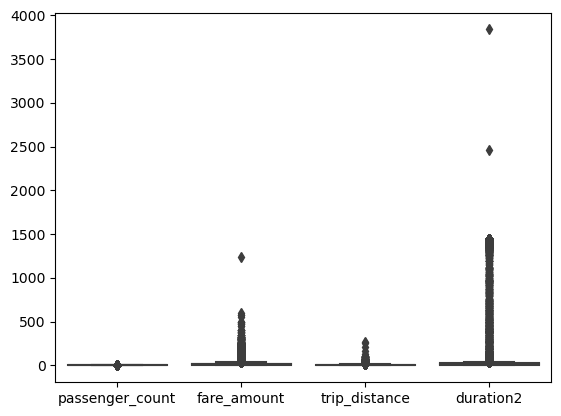

In [24]:
sns.boxplot(data = dff)

In [25]:
# Removing outliers using interquartile range (IQR)

for col in ['passenger_count', 'fare_amount', 'trip_distance', 'duration2']:
    q1 = dff[col].quantile(0.25)
    q3 = dff[col].quantile(0.75)
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
  
    dff = dff[(dff[col] >= lower_bound) & (dff[col] <= upper_bound)]        # filter out outliers

<Axes: >

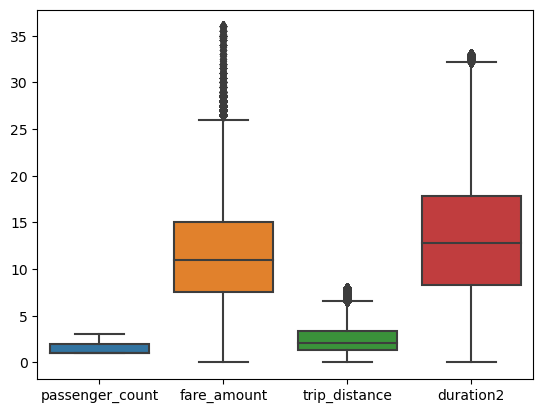

In [26]:
sns.boxplot(data = dff)

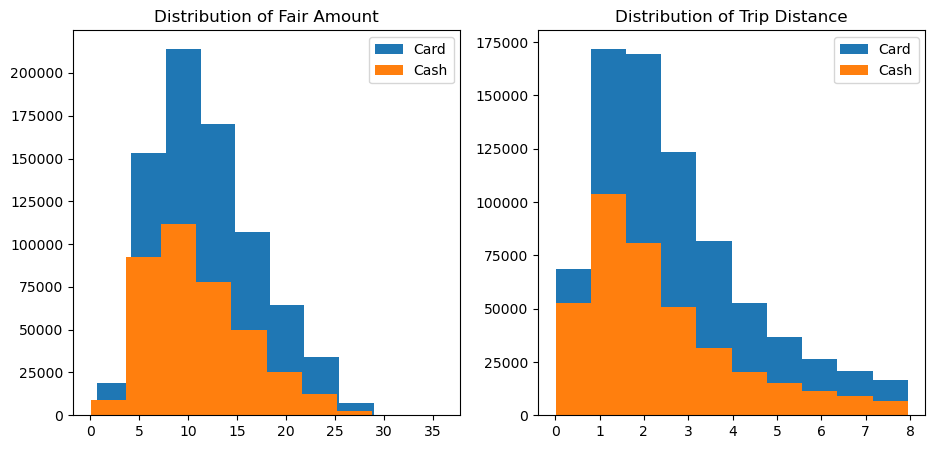

In [27]:
plt.figure(figsize= (11,5))

plt.subplot(1,2,1)                               # allows us to create multiple plots (subplots) in a single figure.
plt.title('Distribution of Fair Amount')
plt.hist(dff[dff['payment_type'] == 'Card']['fare_amount'], label= 'Card')
plt.hist(dff[dff['payment_type'] == 'Cash']['fare_amount'], label= 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(dff[dff['payment_type'] == 'Card']['trip_distance'], label= 'Card')
plt.hist(dff[dff['payment_type'] == 'Cash']['trip_distance'], label= 'Cash')
plt.legend()

# Passenger_count Analysis

In [31]:
p_count = dff.groupby(['payment_type', 'passenger_count'])['passenger_count'].count().reset_index(name = 'count')
p_count

,payment_type,passenger_count,count
0,Card,1,525074
1,Card,2,181182
2,Card,3,62655
3,Cash,1,266344
4,Cash,2,85746
5,Cash,3,28937


In [32]:
p_count['perc'] = (p_count['count'] / p_count['count'].sum()) * 100
p_count

,payment_type,passenger_count,count,perc
0,Card,1,525074,45.661070
1,Card,2,181182,15.755806
2,Card,3,62655,5.448555
3,Cash,1,266344,23.161597
4,Cash,2,85746,7.456576
5,Cash,3,28937,2.516397


In [35]:
# Creating a customize Dataframe 

piv = pd.DataFrame(columns = ['payment_type', 1,2,3])

piv['payment_type'] = ['card', 'cash']
piv

,payment_type,1,2,3
0,card,NaN,NaN,NaN
1,cash,NaN,NaN,NaN


In [38]:
piv.iloc[0, 1:] = p_count.iloc[0:3, -1]
piv.iloc[1, 1:] = p_count.iloc[3:, -1]
piv

,payment_type,1,2,3
0,card,45.66107,15.755806,5.448555
1,cash,23.161597,7.456576,2.516397


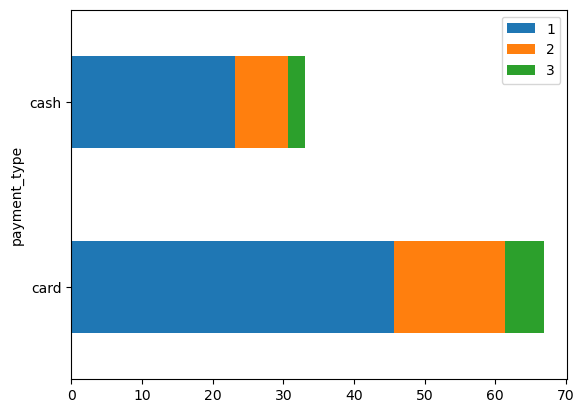

In [39]:
graph = piv.plot(x = 'payment_type', kind = 'barh', stacked = True)

# hypothesis_testing 

<b>Null hypothesis : </b> There is no difference in average fare between customers who use card and customers who use cash.

<b>Alternate hypothesis : </b> There is a difference in average fare between customers who use card and customers who use cash.

Customers who use card to pay is <b>sample 1</b> 

Customers who use cash is <b>sample 2</b>

<b>we need to compare both of their mean.<b/> 

since, <b>fare_amount is a continuous value so, chi-square test is not applicable.</b>

<b>when we compare means of more than 3+ sample then we use Anova Test so, it's not applicable. </b>

<b>when population standard deviation is known so that we can compare sample mean with it then we use Z test. so, not applicable.</b>


In [40]:
#now, we are going to test fare_amount is Normally distributed or not

<b>Q-Q Plot (Quantile-Quantile Plot):</b> 
If the points roughly follow a straight line, the data is approximately normally distributed.

In [60]:
import statsmodels.api as sm
from scipy import stats 

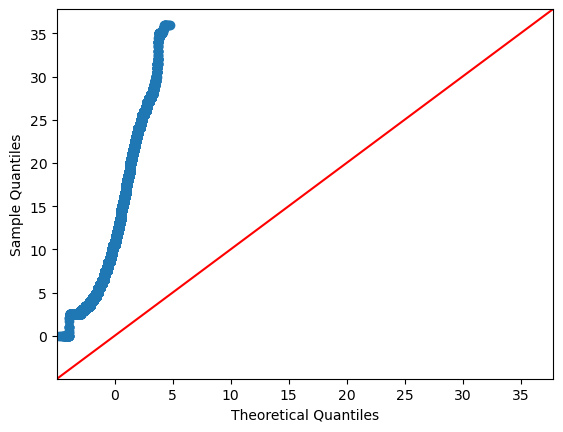

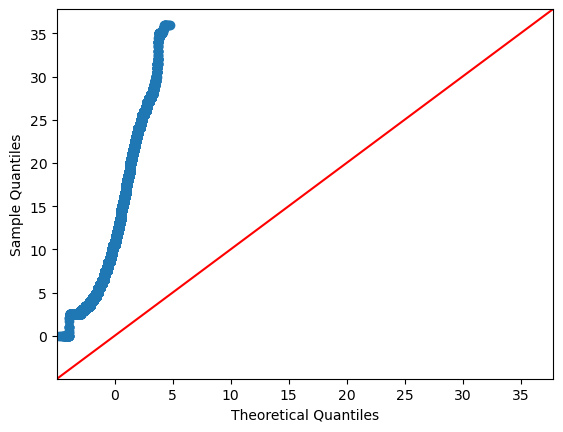

In [51]:
sm.qqplot(dff['fare_amount'], line = '45')

since, <b>Data is not normally distributed and population standard deviation is unknown so, we are going to use t test.</b>

In [58]:
card_sample = dff[dff['payment_type'] == 'Card']['fare_amount']
cash_sample = dff[dff['payment_type'] == 'Cash']['fare_amount']

In [62]:
t_stats, p_value = stats.ttest_ind(a = card_sample, b = cash_sample, equal_var= False)

t_stats, p_value

(107.1880671050652, 0.0)

In [63]:
alpha = 0.05       # significance level

if p_value > 0.05:
    print("Accept the null hypothesis (H₀).There is no difference in average fare regardless of payment_type.")
else:
    print("Reject the null hypothesis (H₀). There is a difference in average fare regardless of payment_type.")       

Reject the null hypothesis (H₀). There is a difference in average fare regardless of payment_type.


In [64]:
# to get mean & standard deviation of fare_amount & trip_distance for each payment_type

dff.groupby(['payment_type']).agg({'fare_amount' : ('mean', 'std'), 'trip_distance' : ('mean' , 'std')}).reset_index()

payment_type fare_amount           trip_distance          
                      mean       std          mean       std
0         Card   12.036415  5.154867      2.672206  1.710199
1         Cash   10.953612  5.071031      2.372101  1.690927

# Journey Insight

<b>Customers paying with cards tend to have a slightly higher average trip_distance and fare_amount compare to those paying with cash. </b>

<b>indicates that customers prefers to pay more with cards when they have high fare amount and long trip distance. </b>